### Import Libraries

In [1]:
import numpy as np
import time
import random
import matplotlib.pyplot as plot
from timeit import timeit

### Functions from Week 4

### Function 1: 1*(x-2)^4+6*(y-9)^2

In [2]:
class Function1 :
    
    def get_quadratic_equation_value(self, x, y) : 
        value = ((x - 2) ** 4) + (6 * ((y - 9) ** 2))
        return value
    
    def get_quadratic_equation_derivative_value(self, x, y) : 
        derivative_x_value = 4 * ((x - 2) ** 3)
        derivative_y_value = (12 * y) - 108
        return derivative_x_value, derivative_y_value
    

### Function 2: Max(x-2,0)+6*|y-9|

In [3]:
class Function2 :
    
    def get_quadratic_equation_value(self, x, y) : 
        value = (max((x - 2), 0)) + (6 * np.abs(y - 9))
        return value
    
    def get_quadratic_equation_derivative_value(self, x, y) : 
        derivative_x_value = np.heaviside((x - 2), 1)
        derivative_y_value = 6 * np.sign(y - 9)
        return derivative_x_value, derivative_y_value
    

###  Implement the global random search algorithm and Gradient Descent

In [4]:
class Global_Random_Search : 
    
    def execute_global_random_search(self, function_object, num_parameters = 2, lower_bound = [0,0], upper_bound = [5,5], 
                                     num_samples = 100) : 
        
        cost_iteration = []
        time_iteration = []
        optimised_cost = float('inf')
        start_time = time.time() * 1000
        
        for i in range(num_samples) : 
            
            parameter_x, parameter_y = [random.uniform(lower_bound[j], upper_bound[j]) for j in range(num_parameters)]
            current_cost = function_object.get_quadratic_equation_value(parameter_x, parameter_y)
            
            if current_cost < optimised_cost : 
                optimised_cost = current_cost
                
            cost_iteration.append(optimised_cost)
            time_iteration.append((time.time() * 1000) - start_time)
            
        return cost_iteration, time_iteration
            
    def execute_gradient_descent(self, function_object, starting_point_x = 1, starting_point_y = 1, alpha = 1, num_iterations = 50) : 
    
        x_point = starting_point_x
        y_point = starting_point_y
        function_values = []
        time_iteration = []
        start_time = time.time() * 1000
        
        for _ in range(num_iterations) : 
            
            function_values.append(function_object.get_quadratic_equation_value(x_point, y_point))
            
            derivative_x_value, derivative_y_value = function_object.get_quadratic_equation_derivative_value(x_point, y_point)
            x_point = x_point - (alpha * derivative_x_value)
            y_point = y_point - (alpha * derivative_y_value)
            
            time_iteration.append((time.time() * 1000) - start_time)
            
           
        return function_values, time_iteration
        

#### Executing Global Random Search for Function 1: 1*(x-2)^4+6*(y-9)^2

In [5]:
function1 = Function1()
grs = Global_Random_Search()

num_parameters = 2
lower_bound = [0, 0]
upper_bound = [10, 10]
num_iterations = 200

grs_cost_iteration_func1, grs_time_iteration_func1 = grs.execute_global_random_search(function_object = function1, num_parameters = num_parameters, lower_bound = lower_bound, upper_bound = upper_bound, num_samples = num_iterations)

#### Executing Gradient Descent for Function 1: 1*(x-2)^4+6*(y-9)^2

In [6]:
function1 = Function1()
grs = Global_Random_Search()

starting_point_x = 5
starting_point_y = 5
alpha = 0.01
num_iterations = 200


gd_cost_iteration_func1, gd_time_iteration_func1 = grs.execute_gradient_descent(function1, starting_point_x, starting_point_y, alpha, num_iterations)

#### Plots for Function 1: 1*(x-2)^4+6*(y-9)^2

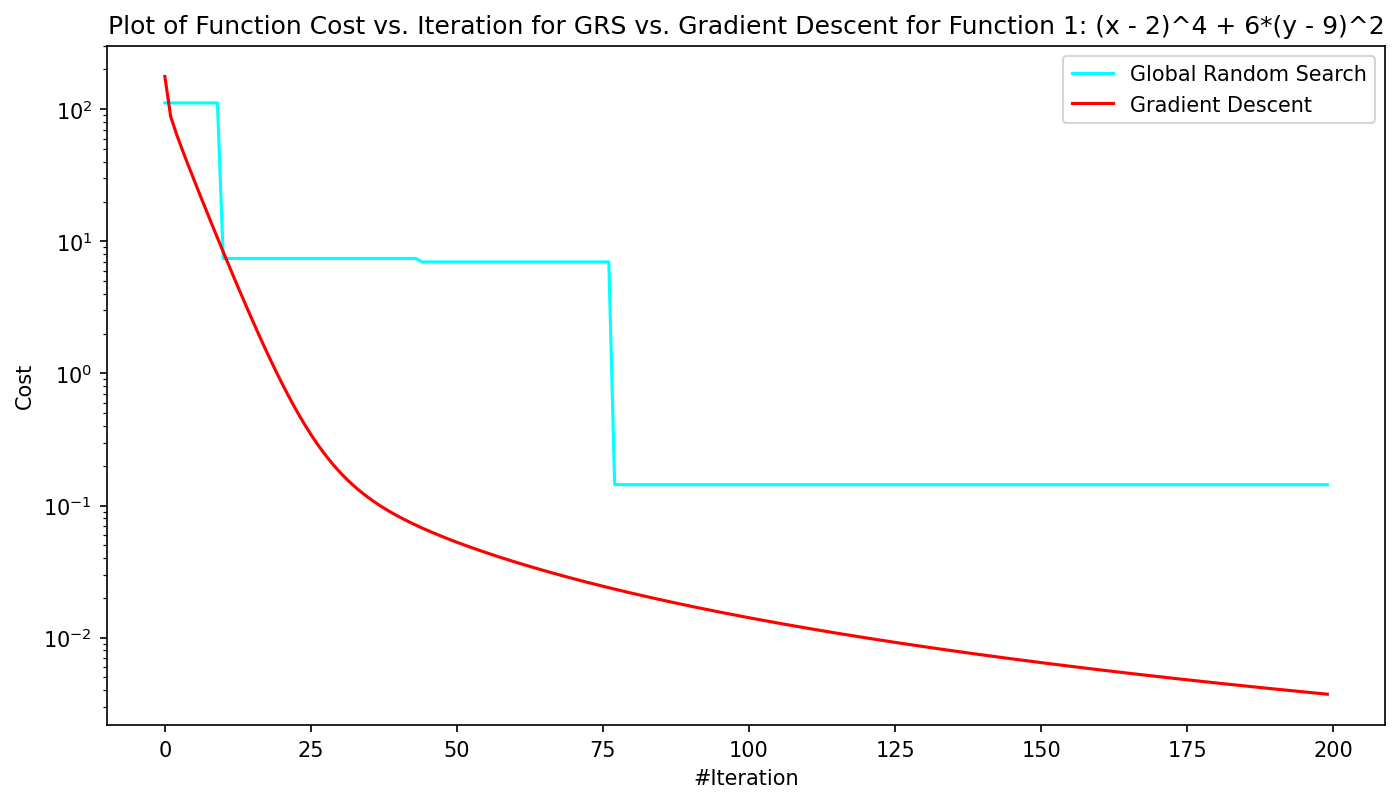

In [7]:
plot.figure(figsize=(11, 6), dpi=150)
plot.semilogy(range(num_iterations), grs_cost_iteration_func1, color = 'cyan', label = 'Global Random Search')
plot.semilogy(range(num_iterations), gd_cost_iteration_func1, color = 'red', label = 'Gradient Descent')
plot.xlabel('#Iteration')
plot.ylabel('Cost')
plot.title('Plot of Function Cost vs. Iteration for GRS vs. Gradient Descent for Function 1: (x - 2)^4 + 6*(y - 9)^2') 
plot.yscale("log")
plot.legend()
plot.show()

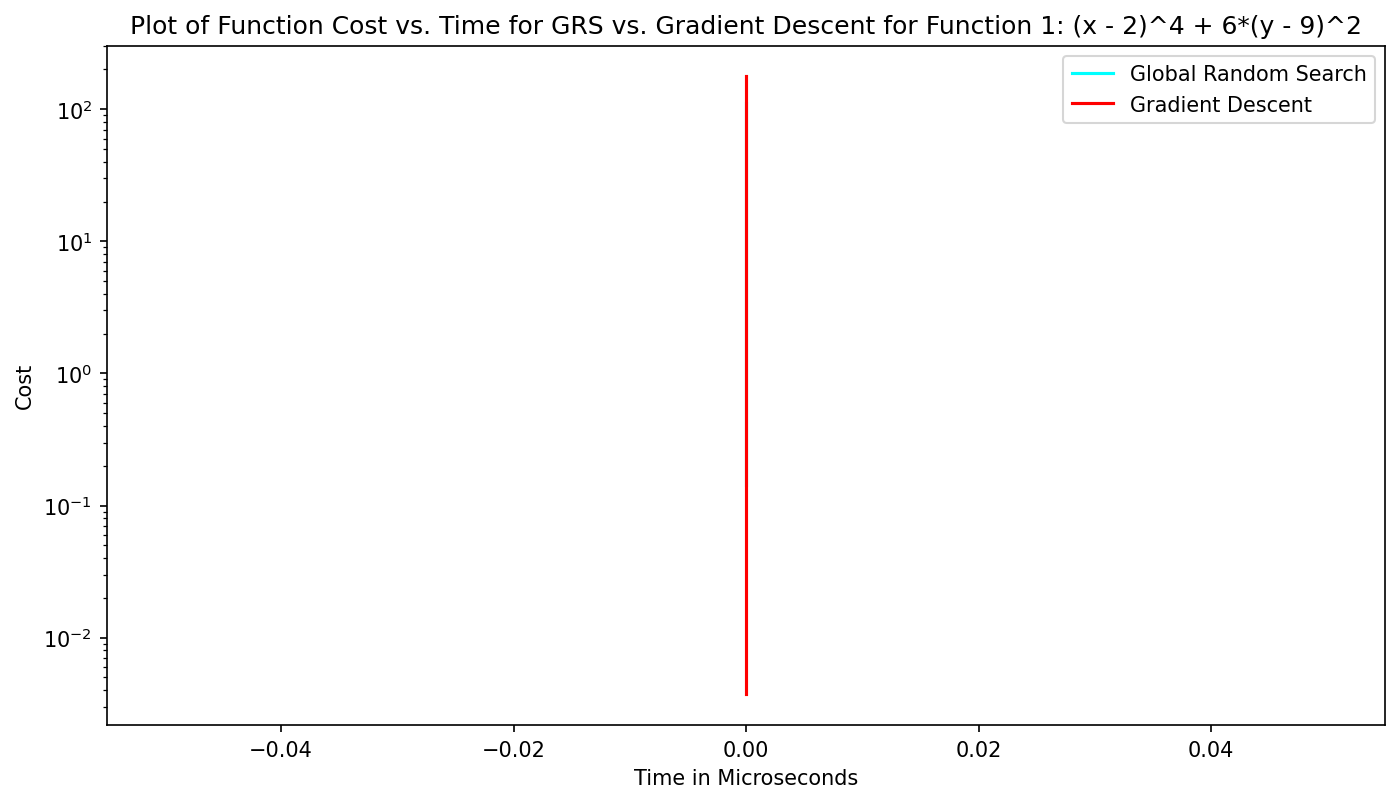

In [8]:
plot.figure(figsize=(11, 6), dpi=150)
plot.semilogy(grs_time_iteration_func1, grs_cost_iteration_func1, color = 'cyan', label = 'Global Random Search')
plot.semilogy(gd_time_iteration_func1, gd_cost_iteration_func1, color = 'red', label = 'Gradient Descent')
plot.xlabel('Time in Microseconds')
plot.ylabel('Cost')
plot.title('Plot of Function Cost vs. Time for GRS vs. Gradient Descent for Function 1: (x - 2)^4 + 6*(y - 9)^2') 
plot.yscale("log")
plot.legend()
plot.show()

#### Executing Global Random Search for Function 2: Max(x-2,0)+6*|y-9|

In [9]:
function2 = Function2()
grs = Global_Random_Search()

num_parameters = 2
lower_bound = [0, 0]
upper_bound = [10, 10]
num_iterations = 200

grs_cost_iteration_func2, grs_time_iteration_func2 = grs.execute_global_random_search(function_object = function2, num_parameters = num_parameters, lower_bound = lower_bound, upper_bound = upper_bound, num_samples = num_iterations)

#### Executing Gradient Descent for Function 2: Max(x-2,0)+6*|y-9|

In [10]:
function2 = Function2()
grs = Global_Random_Search()

starting_point_x = 5
starting_point_y = 5
alpha = 0.01
num_iterations = 200

gd_cost_iteration_func2, gd_time_iteration_func2 = grs.execute_gradient_descent(function2, starting_point_x, starting_point_y, alpha, num_iterations)

#### Plots for Function 2: Max(x-2,0)+6*|y-9|

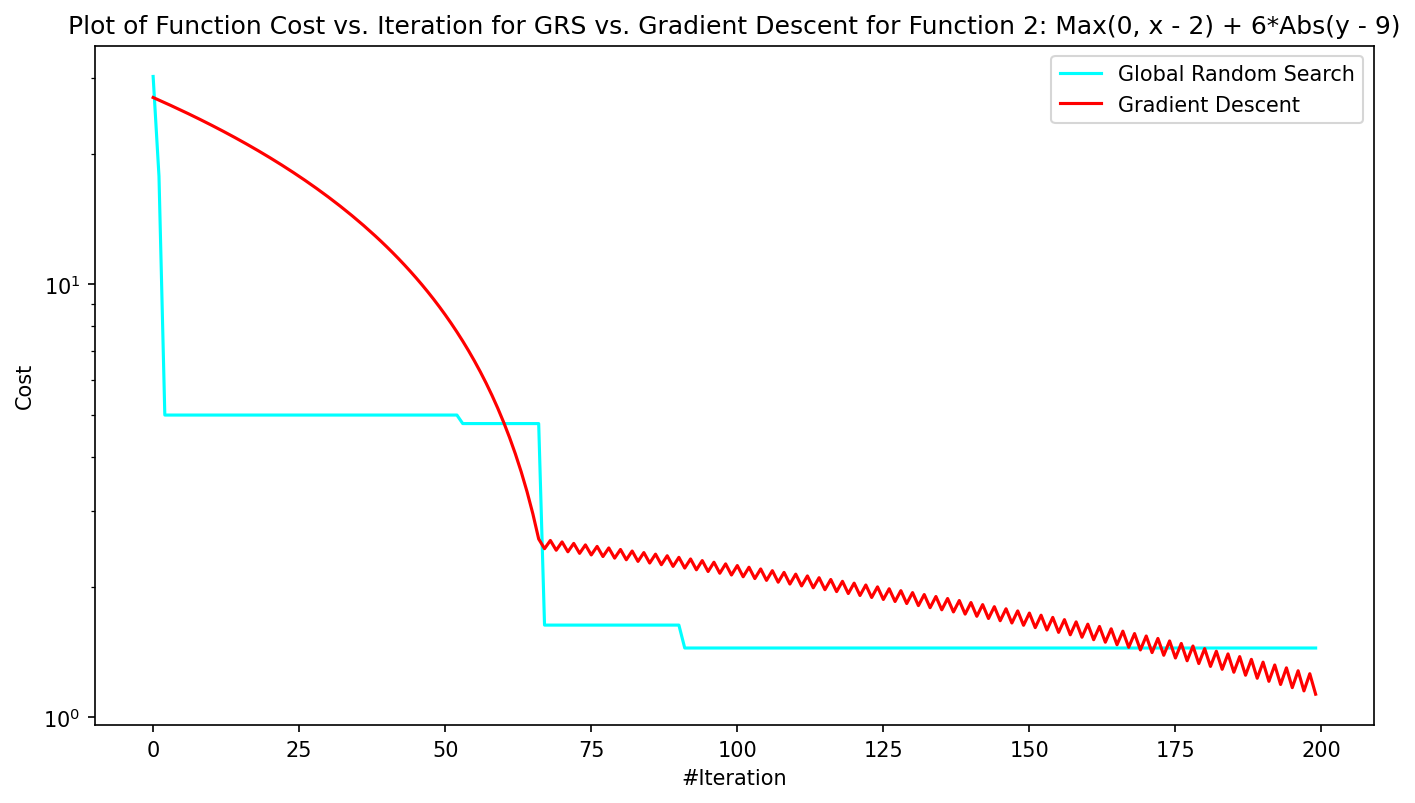

In [11]:
plot.figure(figsize=(11, 6), dpi=150)
plot.semilogy(range(num_iterations), grs_cost_iteration_func2, color = 'cyan', label = 'Global Random Search')
plot.semilogy(range(num_iterations), gd_cost_iteration_func2, color = 'red', label = 'Gradient Descent')
plot.xlabel('#Iteration')
plot.ylabel('Cost')
plot.title('Plot of Function Cost vs. Iteration for GRS vs. Gradient Descent for Function 2: Max(0, x - 2) + 6*Abs(y - 9)') 
plot.yscale("log")
plot.legend()
plot.show()

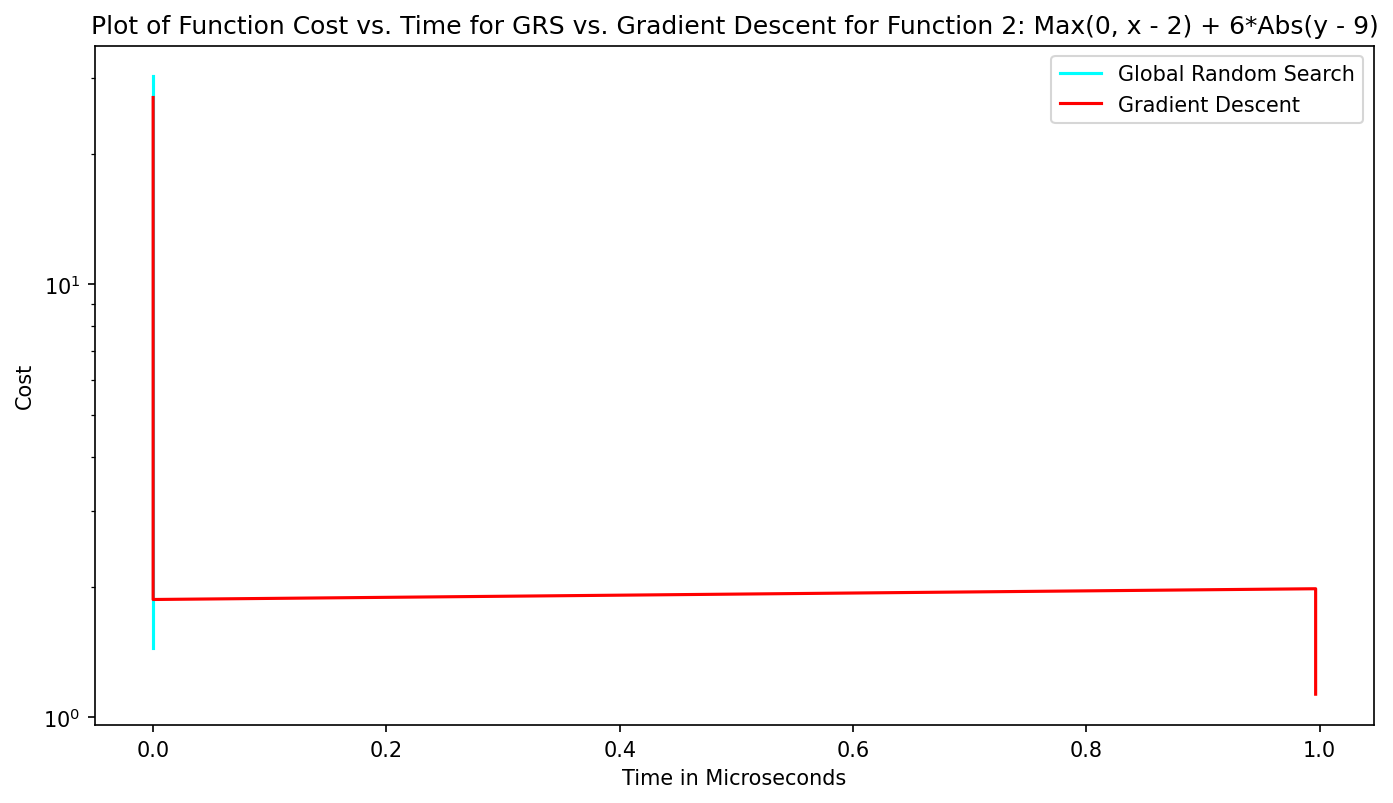

In [12]:
plot.figure(figsize=(11, 6), dpi=150)
plot.semilogy(grs_time_iteration_func2, grs_cost_iteration_func2, color = 'cyan', label = 'Global Random Search')
plot.semilogy(gd_time_iteration_func2, gd_cost_iteration_func2, color = 'red', label = 'Gradient Descent')
plot.xlabel('Time in Microseconds')
plot.ylabel('Cost')
plot.title('Plot of Function Cost vs. Time for GRS vs. Gradient Descent for Function 2: Max(0, x - 2) + 6*Abs(y - 9)') 
plot.yscale("log")
plot.legend()
plot.show()